In [43]:
from os import listdir
from os.path import isdir, join
import tensorflow
from tensorflow.keras import layers, models
import numpy as np

print(tensorflow.__file__)
print(tensorflow.keras.__file__)

C:\Users\soong\Anaconda3\lib\site-packages\tensorflow\__init__.py
C:\Users\soong\Anaconda3\lib\site-packages\tensorflow\keras\__init__.py


In [160]:
# Create list of all targets (minus background noise)
dataset_path = "C:\\Users\\soong\\OneDrive\\Desktop\\DEEP LEARNING FYP\\Training_LATEST\\Dataset"
all_targets = all_targets = [name for name in listdir(dataset_path) if isdir(join(dataset_path, name))]
print(all_targets)

['Explosion', 'Noise']


In [27]:
# Settings
feature_sets_path = "C:\\Users\\soong"
feature_sets_filename = 'all_targets_mfcc_sets.npz'
model_filename = 'fyp_explosion_model.h5'
explosion_signal = 'Explosion'

In [22]:
# Load feature sets
feature_sets = np.load(join(feature_sets_path, feature_sets_filename))
print(feature_sets.files)

['x_train', 'y_train', 'x_val', 'y_val', 'x_test', 'y_test']


In [23]:
# Assign feature sets
x_train = feature_sets['x_train']
y_train = feature_sets['y_train']
x_val = feature_sets['x_val']
y_val = feature_sets['y_val']
x_test = feature_sets['x_test']
y_test = feature_sets['y_test']

In [24]:
# Look at tensor dimensions
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(10620, 16, 31)
(5310, 16, 31)
(1770, 16, 31)


In [25]:
# Peek at labels
print(y_val)

[0. 0. 0. ... 0. 1. 1.]


In [120]:
# Convert ground truth arrays to one wake word (1) and 'other' (0)
explosion_signal_index = all_targets.index(explosion_signal)
y_train = np.equal(y_train, explosion_signal_index).astype('float64')
y_val = np.equal(y_val, explosion_signal_index).astype('float64')
y_test = np.equal(y_test, explosion_signal_index).astype('float64')

print(y_train)
print(y_train)
print(y_val)

[0. 0. 0. ... 0. 0. 1.]
[0. 0. 0. ... 0. 0. 1.]
[0. 0. 0. ... 0. 1. 1.]


In [30]:
# What percentage of 'Explosion' appear in validation labels
print(sum(y_val) / len(y_val))
print(1 - sum(y_val) / len(y_val))

0.848210922787194
0.151789077212806


In [94]:
# View the dimensions of our input data
print(x_train.shape)

(10620, 16, 31)


In [145]:
# CNN for TF expects (batch, height, width, channels)
# So we reshape the input tensors with a "color" channel of 1
x_train = x_train.reshape(x_train.shape[0], 
                          x_train.shape[2], 
                          x_train.shape[1] 
                          )
x_val = x_val.reshape(x_val.shape[0], 
                      x_val.shape[2], 
                      x_val.shape[1] 
                      )
x_test = x_test.reshape(x_test.shape[0], 
                        x_test.shape[2], 
                        x_test.shape[1] 
                        )
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)


# Input shape for CNN is size of MFCC of 1 sample
sample_shape = x_test.shape[1:]
print(sample_shape)


(10620, 31, 16)
(5310, 31, 16)
(1770, 31, 16)
(31, 16)


In [146]:
# Build network topology
model = models.Sequential()

# Bi-LSTM layer
#model.add(layers.Bidirectional(layers.LSTM(64, input_shape=(31,16), return_sequences=True))) # (timesteps, no. of features)
model.add(layers.LSTM(64, input_shape=(31,16), return_sequences=True)) # (timesteps, no. of features)
model.add(layers.LSTM(64))

# dense layer
model.add(layers.Dense(64,activation='relu')) 
model.add(layers.Dropout(0.3)) # mitigate over-fitting

# output layer
model.add(layers.Dense(2, activation='softmax'))
    

In [147]:
# create network
input_shape = (1,31,16) 
model.build(input_shape)

# compile model
optimiser = tensorflow.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimiser, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_21 (LSTM)               (None, 31, 64)            20736     
_________________________________________________________________
lstm_22 (LSTM)               (None, 64)                33024     
_________________________________________________________________
dense_42 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_21 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_43 (Dense)             (None, 2)                 130       
Total params: 58,050
Trainable params: 58,050
Non-trainable params: 0
_________________________________________________________________
None


In [149]:
history = model.fit(x_train, y_train, validation_data=(x_val,y_val), epochs=30, batch_size=16)

Epoch 1/30
664/664 [==============================] - 15s 23ms/step - loss: 9.4851e-09 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/30
664/664 [==============================] - 17s 26ms/step - loss: 6.3982e-09 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/30
664/664 [==============================] - 17s 26ms/step - loss: 3.8951e-09 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/30
664/664 [==============================] - 18s 27ms/step - loss: 9.9789e-09 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/30
664/664 [==============================] - 17s 26ms/step - loss: 1.1348e-08 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/30
664/664 [==============================] - 18s 27ms/step - loss: 1.6837e-09 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/30
664/664 [==============================] - 18s 27ms/step - loss: 1.3470e-09 -

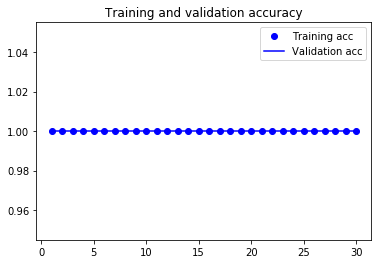

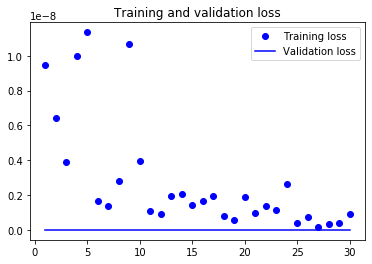

In [151]:
# Plot results
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [154]:
# Save the model as a file
models.save_model(model, model_filename)

In [155]:
# See which are 'Explosion'
for idx, y in enumerate(y_test):
    if y == 1:
        print(idx)

4
5
8
13
17
19
20
21
37
40
43
46
103
104
106
111
113
119
136
142
146
154
167
172
175
180
185
187
202
203
206
211
216
240
242
244
246
256
259
269
283
293
304
310
311
314
322
344
363
370
373
374
379
390
394
396
400
416
418
423
424
426
428
440
448
449
460
463
470
483
484
489
497
498
505
512
522
532
537
543
548
552
560
564
570
575
582
586
590
597
598
600
601
604
618
623
625
628
629
634
636
637
644
650
657
680
682
693
698
701
703
708
712
714
718
721
722
730
731
732
734
740
751
758
770
781
786
793
801
820
829
835
837
840
861
875
876
879
881
892
914
919
921
927
929
930
934
935
936
946
948
954
962
966
969
971
972
984
988
992
995
997
1009
1024
1045
1064
1071
1072
1091
1097
1106
1111
1116
1134
1135
1139
1143
1160
1180
1200
1201
1203
1204
1216
1218
1223
1256
1274
1277
1299
1316
1318
1328
1337
1340
1341
1345
1348
1354
1358
1359
1370
1381
1387
1395
1398
1405
1413
1414
1417
1435
1449
1451
1453
1457
1471
1482
1483
1495
1499
1503
1511
1513
1514
1518
1547
1555
1567
1570
1599
1603
1607
1621
1629
1639
16

In [158]:
# Evaluate model with test set
model.evaluate(x=x_test, y=y_test)

56/56 [==============================] - 0s 7ms/step - loss: 0.0000e+00 - accuracy: 1.0000


[0.0, 1.0]

In [ ]:
X = wavread()